*Eduardus Tjitrahardja | @edutjie | 2022*

# Assignment 1: Titanic Data Visualization

## Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Style SNS

In [33]:
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_palette('deep')

## Load Dataset

**Variable Notes**
- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- **sibsp**: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
- **parch**: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

In [19]:
df = pd.read_csv('../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize Data

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols = df.select_dtypes(include=['object']).columns.to_list()

### Single Variable

#### Hist Plot

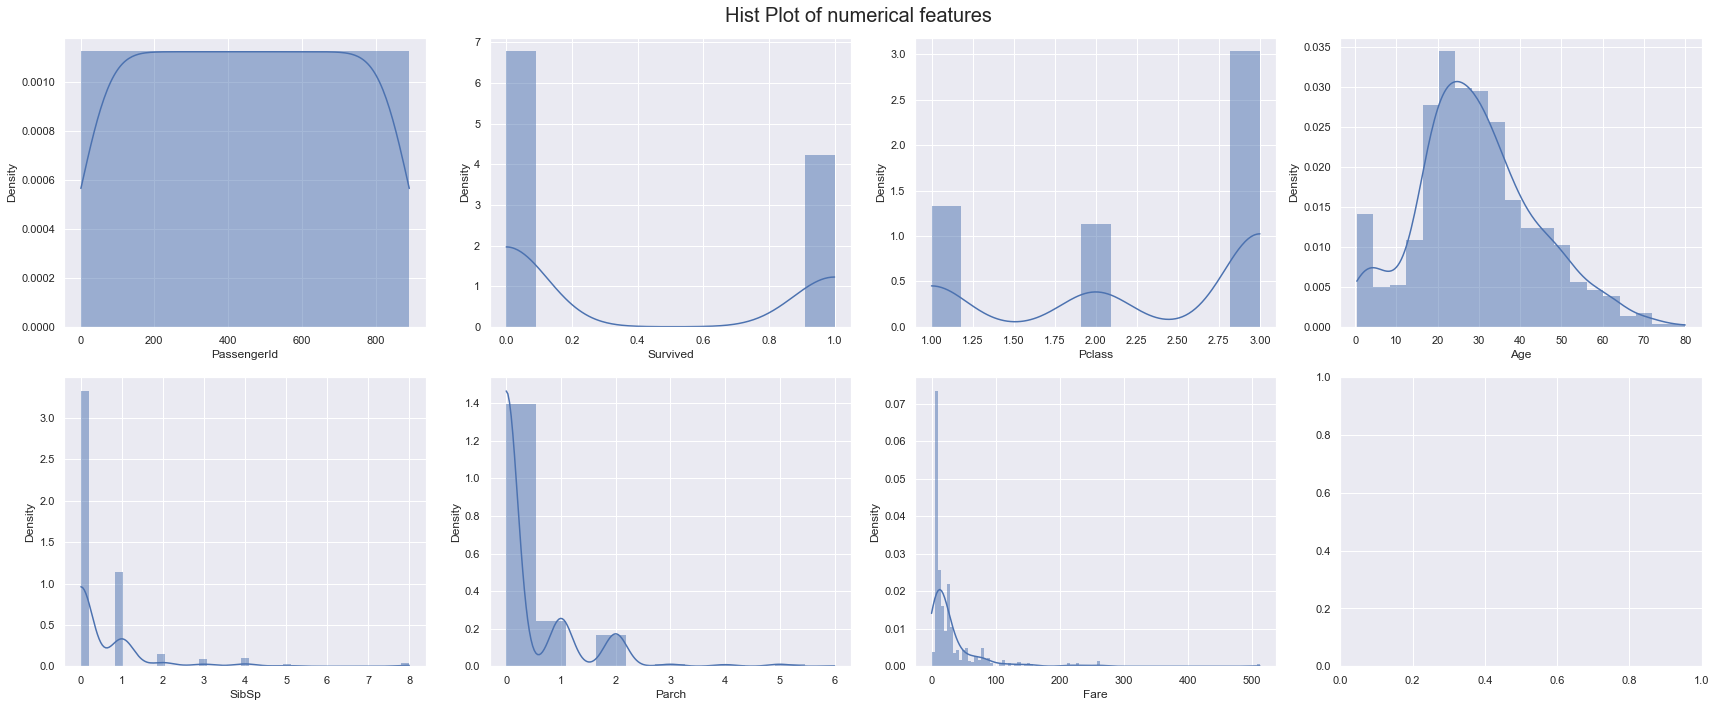

In [24]:
# create a figure
fig, axs = plt.subplots(2, 4, figsize=(24, 10))
fig.suptitle('Hist Plot of numerical features', fontsize=20)
for i, col in enumerate(num_cols):
    sns.histplot(x=df[col], ax=axs[i // 4, i % 4], kde=True, stat="density", linewidth=0)
fig.tight_layout()

**Observations:**
- PassengerId feature is irrelevant because it has too many unique value
- Survived, Pclass, SibSp, Parch are categorical ordinal
- Age feature has a little right skewness, most of the passenger is about 20-30 years old
- Fare feature has right skewness, most of the passenger paid less than 100

In [25]:
# remove PassengerId, Survived, Pclass, SibSp, Parch from num_cols
for col in ['PassengerId', 'Survived', 'Pclass','SibSp', 'Parch']:
    num_cols.remove(col)
    
# add categorical ordinal features to cat_cols
cat_cols.extend(['Survived', 'Pclass','SibSp', 'Parch'])

#### Box Plot

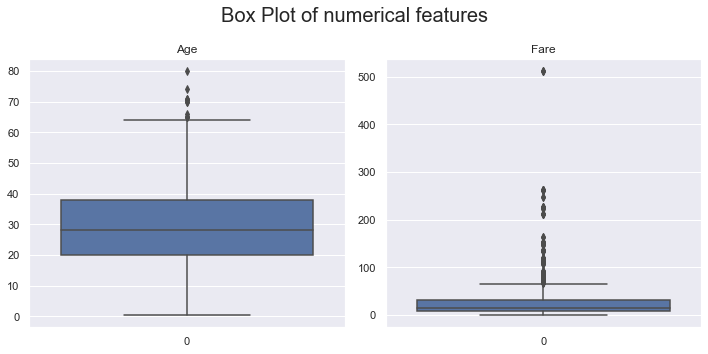

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Box Plot of numerical features", fontsize=20)
for i, col in enumerate(num_cols):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(col)
fig.tight_layout()

#### Count Plot

In [27]:
len(cat_cols)

9

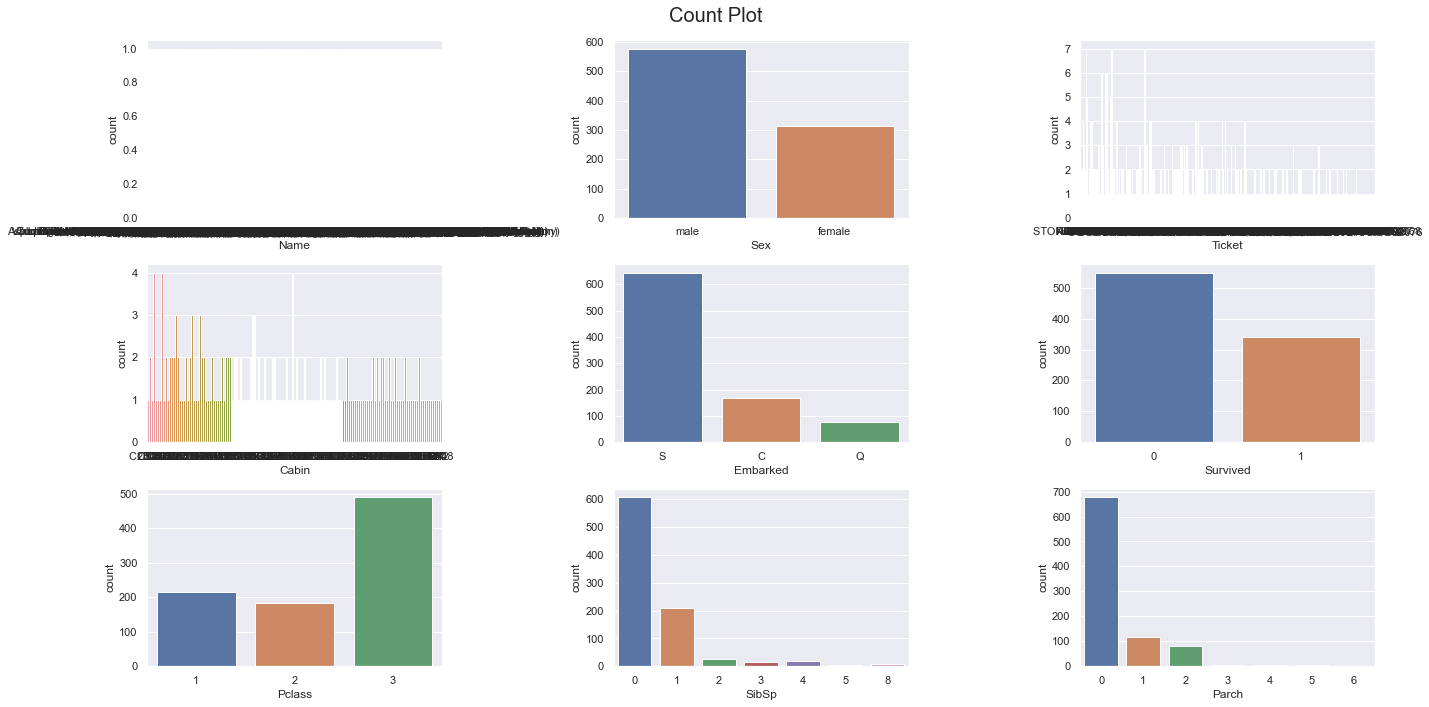

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Count Plot', fontsize=20)
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axs[i//3, i%3])
fig.tight_layout()

**Observations:**
- Name, Ticket, Cabin are irrelevate since they have too many unique value
- We can see that most of the passengers:
  - is male
  - ' port of embarkation is S (Southampton)
  - doesn't survive
  - is in 3rd class (lower class)
  - has 0 sibling/spouse
  - has 0 parent/children

In [29]:
# remove Name, Ticket, Cabin from cat_cols
for col in ['Name', 'Ticket', 'Cabin']:
    cat_cols.remove(col)

### Two Variables

In [30]:
len(cat_cols), len(num_cols)

(6, 2)

#### 2 Variable Bar Chart

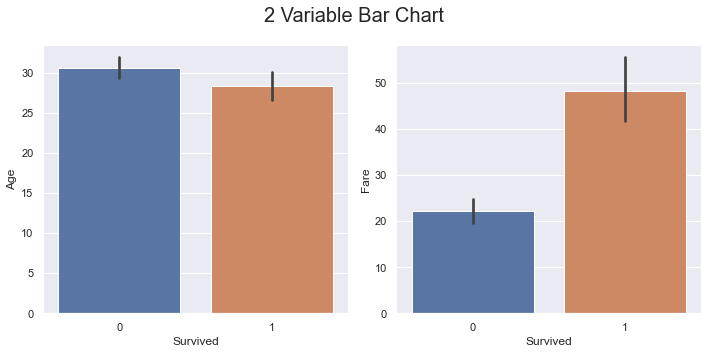

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('2 Variable Bar Chart', fontsize=20)
for i, num_col in enumerate(num_cols):
    sns.barplot(x='Survived', y=num_col, data=df, ax=axs[i])
fig.tight_layout()

**Observations:**
- Older Passengers is more likely to not survive
- Passengers with more expensive fare is more likely to survive

#### Scatter Plot

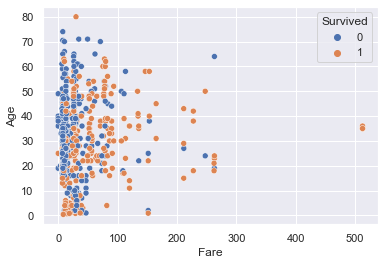

In [32]:
sns.scatterplot(x='Fare', y='Age', data=df, hue='Survived')
plt.show()

**Observations:**
- There is **no correlation** between the numeric columns

### Multiple Variable

#### Heat Map

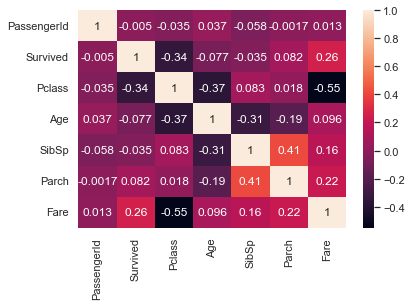

In [36]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**Observations:**
- The correlation between:
  - Parch and SibSp is quite high, that means passengers with parents/childrens tends to have their siblings/spouses also with them
  - Fare and Survived, as we have seen that the higher the fare, the higher the posibility to survive
  - Fare and Parch, that means passengers with parents/childrens pays more (that makes sense)
  - Fare and SibSp, same with Parch that passengers with siblings/spouses pays more

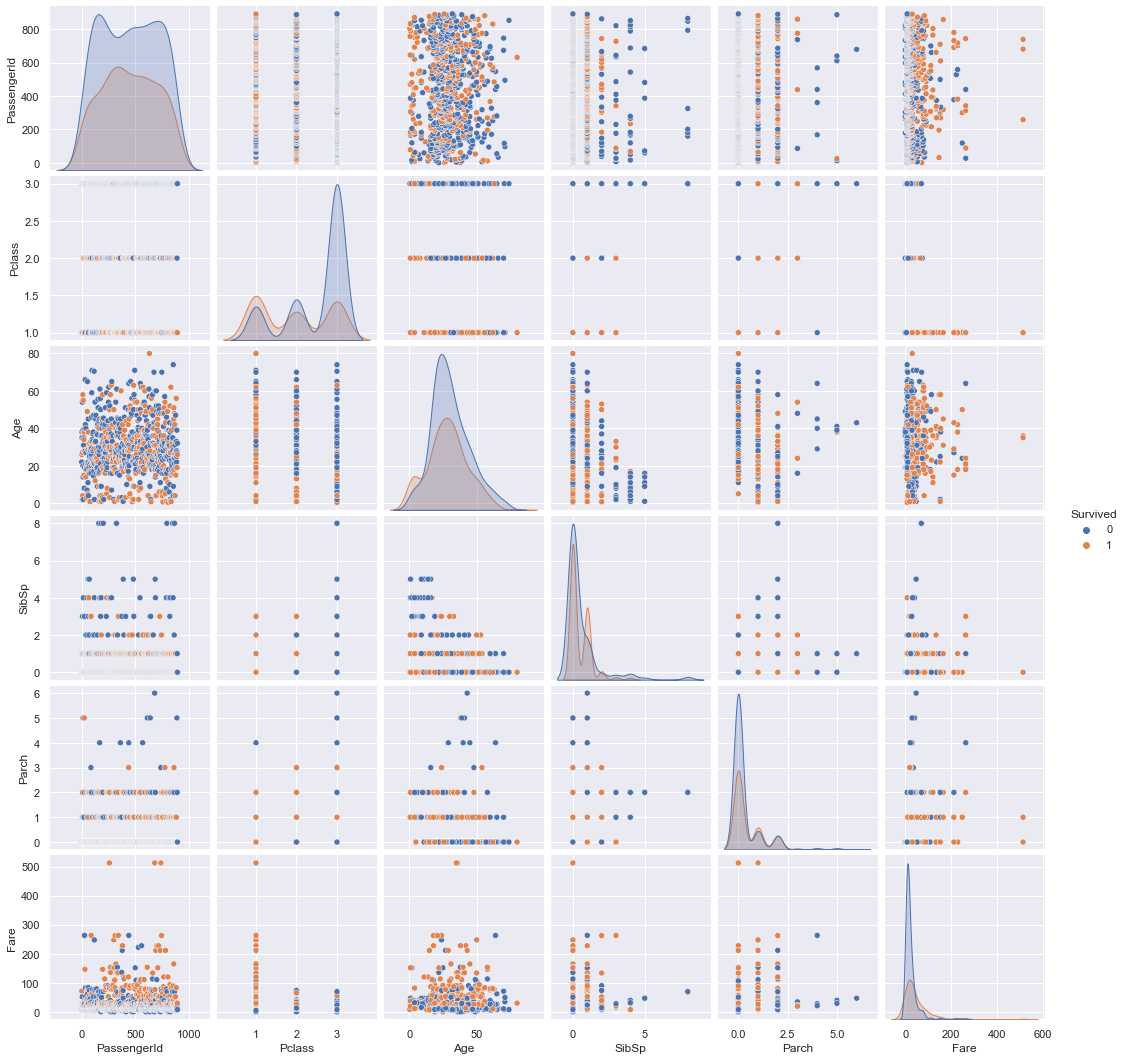

In [40]:
sns.pairplot(df, hue='Survived')
plt.show()